In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import filters
from PIL import Image
from skimage.color import rgb2gray

# def compute_harris_response(im,sigma=1):
#     """ Compute the Harris corner detector response function
#     for each pixel in a graylevel image. """
#     # derivatives
#     imx = np.zeros(im.shape)
#     filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)
#     imy = np.zeros(im.shape)
#     filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)
#     # compute components of the Harris matrix
#     Wxx = filters.gaussian_filter(imx*imx,sigma)
#     Wxy = filters.gaussian_filter(imx*imy,sigma)
#     Wyy = filters.gaussian_filter(imy*imy,sigma)
#     # determinant and trace
#     Wdet = Wxx*Wyy - Wxy**2
#     Wtr = Wxx + Wyy
#     return Wdet / Wtr
#     #Step 4: Harris response calculation
#     k = 0.05
#     harris_response = Wdet - k * Wtr ** 2

# '''This gives an image with each pixel containing the value of the Harris response function.'''

In [98]:
def compute_harris_response(im,sigma=1):
    """ Compute the Harris corner detector response function
    for each pixel in a graylevel image. """
    # derivatives
    k = 0.06
    imx = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)
    imy = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)
    # compute components of the Harris matrix
    Wxx = filters.gaussian_filter(imx*imx,sigma)
    Wxy = filters.gaussian_filter(imx*imy,sigma)
    Wyy = filters.gaussian_filter(imy*imy,sigma)
    # determinant and trace
    Wdet = Wxx*Wyy - Wxy**2
    Wtr = Wxx + Wyy
    return  Wdet - k * Wtr ** 2

In [99]:
'''Taking all
points with values above a threshold, with the additional constraint that corners must be
separated with a minimum distance, is an approach that often gives good results. To do this,
take all candidate pixels, sort them in descending order of corner response values, and mark
off regions too close to positions already marked as corners.'''

def get_harris_points(harrisim,min_dist,threshold):
    """ Return corners from a Harris response image
    min_dist is the minimum number of pixels separating
    corners and image boundary. """
    # find top corner candidates above a threshold
    corner_threshold = harrisim.max() * threshold
    harrisim_t = (harrisim > corner_threshold) * 1
    # get coordinates of candidates
    coords = np.array(harrisim_t.nonzero()).T
    # ...and their values
    candidate_values = [harrisim[c[0],c[1]] for c in coords]
    # sort candidates
    index = np.argsort(candidate_values)
    # store allowed point locations in array
    allowed_locations = np.zeros(harrisim.shape)
    allowed_locations[min_dist:-min_dist,min_dist:-min_dist] = 1
    # select the best points taking min_distance into account
    filtered_coords = []
    for i in index:
        if allowed_locations[coords[i,0],coords[i,1]] == 1:
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i,0]-min_dist):(coords[i,0]+min_dist),
            (coords[i,1]-min_dist):(coords[i,1]+min_dist)] = 0
    return filtered_coords

In [100]:
def plot_harris_points(image,filtered_coords):
    """ Plots corners found in image. """
    plt.figure()
    imggray = rgb2gray(image)
    plt.imshow(imggray,cmap="gray")
    plt.plot([p[1] for p in filtered_coords],[p[0] for p in filtered_coords], '.r', markersize=3)
    plt.axis("off")
    plt.show()

In [101]:
def plot_harris_points(image,filtered_coords):
    """ Plots corners found in image. """
    plt.figure()
    imggray = rgb2gray(image)
    plt.imshow(imggray,cmap="gray")
    plt.plot([p[1] for p in filtered_coords],[p[0] for p in filtered_coords], '.r', markersize=3)
    #plt.imshow(imggray, cmap="gray")
    plt.axis("off")
    plt.show()

c:\users\nisha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  after removing the cwd from sys.path.


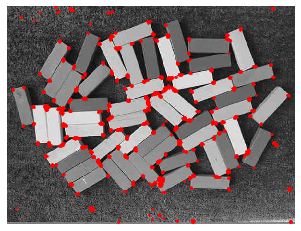

'The image is opened and converted to grayscale. Then, the response function is computed\nand points selected based on the response values. Finally, the points are plotted overlaid on\nthe original image.'

In [102]:
im = np.array(Image.open('Clipboard01.jpg').convert('L'))
harrisim = compute_harris_response(im)
filtered_coords = get_harris_points(harrisim,1,0.01)
plot_harris_points(im, filtered_coords)

'''The image is opened and converted to grayscale. Then, the response function is computed
and points selected based on the response values. Finally, the points are plotted overlaid on
the original image.'''

c:\users\nisha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  after removing the cwd from sys.path.


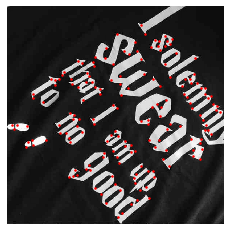

In [103]:
im2 = np.array(Image.open('Clipboard02.jpg').convert('L'))

harrisim2 = compute_harris_response(im2,3)
filtered_coords2 = get_harris_points(harrisim2,10,0.15)
plot_harris_points(im2, filtered_coords2)